<a href="https://colab.research.google.com/github/pawel-kowal/machine-learning/blob/main/supervised/06_classification/02_k_neighbours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

np.random.seed(42)
sns.set(font_scale=1.3)

In [21]:
from sklearn.datasets import load_iris

raw_data = load_iris()
raw_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [22]:
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']

print(f'{data[:5]}\n')
print(f'{target[:5]}')

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

[0 0 0 0 0]


In [23]:
all_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [24]:
df = pd.DataFrame(data=np.c_[data, target], columns=all_data['feature_names'] + ['class'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
class,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [26]:
df['class'].value_counts()

0.0    50
1.0    50
2.0    50
Name: class, dtype: int64

In [27]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

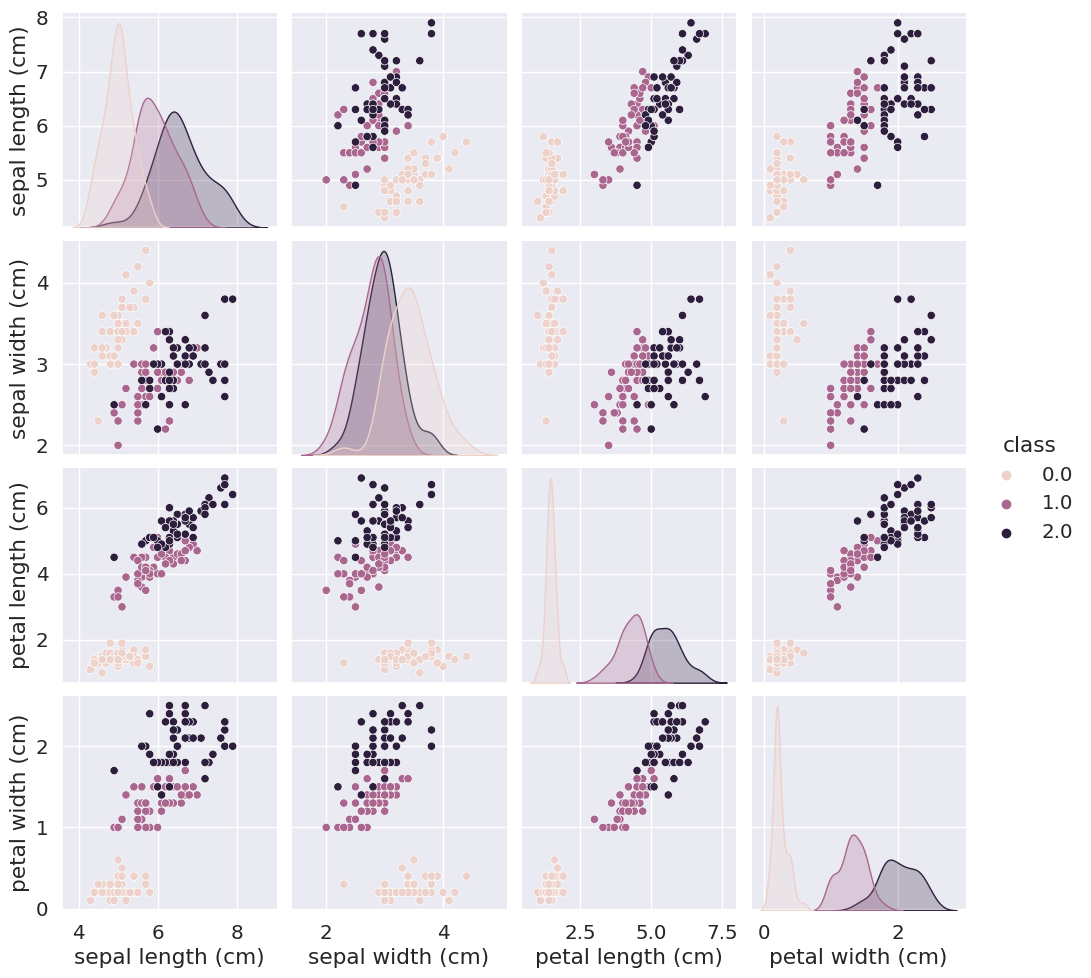

In [28]:
_ = sns.pairplot(df, vars=all_data['feature_names'], hue='class')

In [29]:
corr=df.corr()

<ipython-input-30-74952638425a>:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<Axes: >

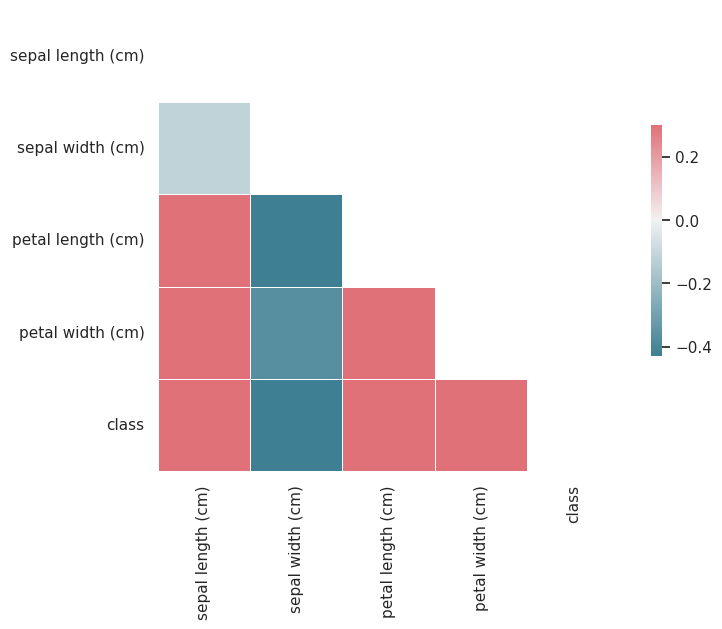

In [30]:
sns.set(style='white')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8,6))
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(corr, mask=mask, cmap = cmap, vmax=.3, center=0,
            square=True, linewidth=.5, cbar_kws={'shrink': .5})

In [38]:
data = data[:, :2]

print('data shape:', data.shape)
print('target shape:', target.shape)
sns.set()

data shape: (150, 2)
target shape: (150,)


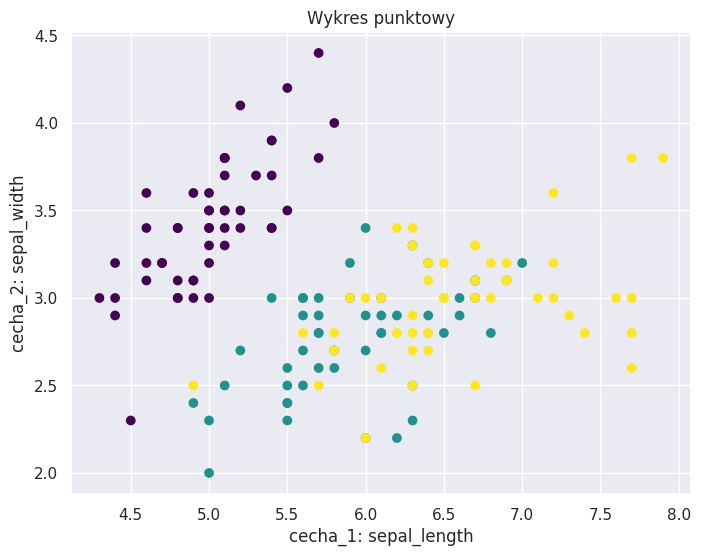

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=target, cmap='viridis')
plt.title('Wykres punktowy')
plt.xlabel('cecha_1: sepal_length')
plt.ylabel('cecha_2: sepal_width')
plt.show()

In [33]:
df = pd.DataFrame(data=np.c_[data, target], columns=['sepal_length', 'sepal_width', 'class'])
px.scatter(df, x='sepal_length', y='sepal_width', color='class', width=800)

#K-nearest Neighbour


In [34]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(data, target)

KNeighborsClassifier()

###Wyznaczenie granic decyzyjnych

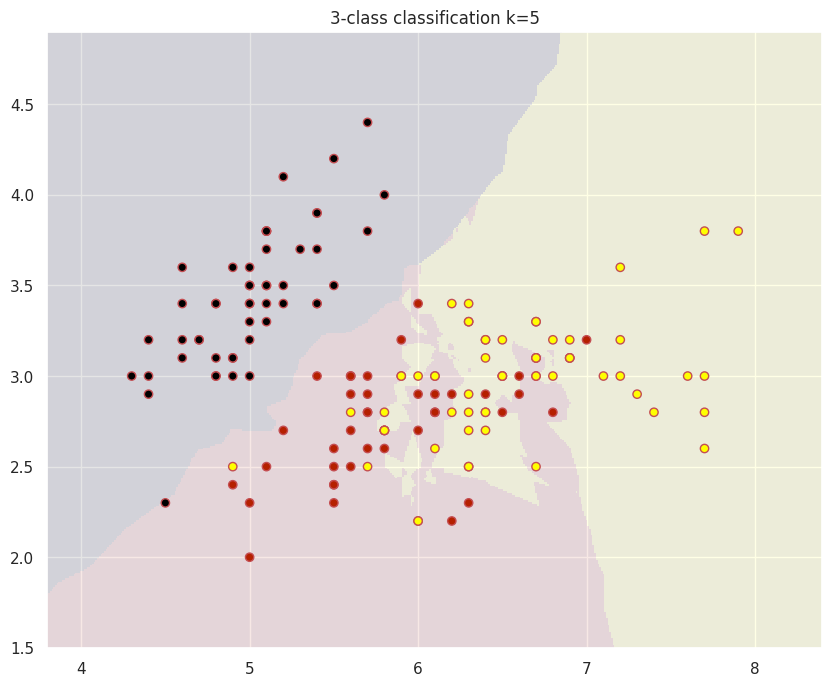

In [40]:
x_min, x_max = data[:, 0].min() - 0.5, data[:, 0].max() + 0.5
y_min, y_max = data[:, 1].min() - 0.5, data[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
mesh = np.c_[xx.ravel(), yy.ravel()]
Z = classifier.predict(mesh)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
plt.scatter(data[:, 0], data[:, 1], c=target, cmap='gnuplot', edgecolors='r')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('3-class classification k=5')
plt.show()

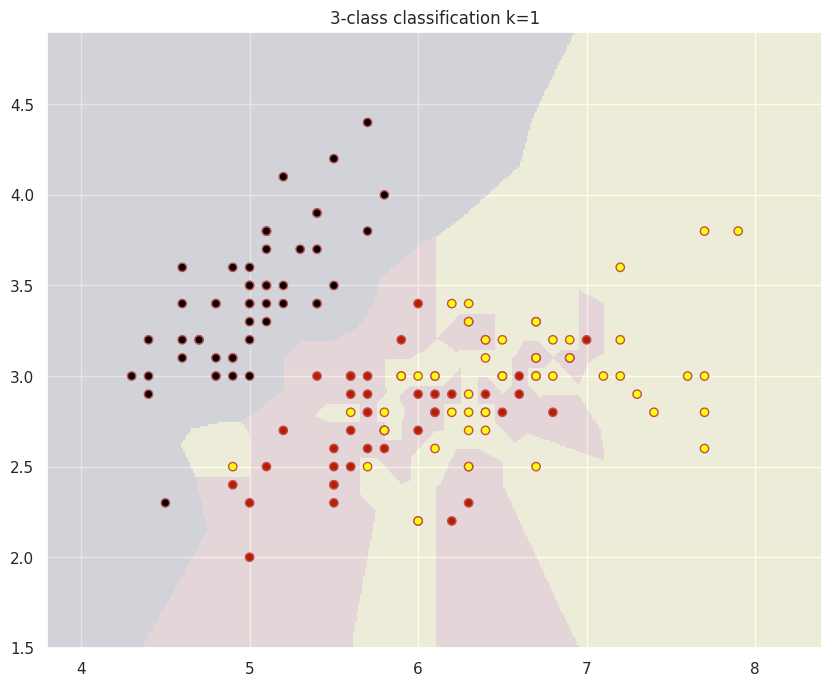

In [41]:
def plot_decision_boundries(n_neighbors=1):
     
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier.fit(data, target)

    x_min, x_max = data[:, 0].min() - 0.5, data[:, 0].max() + 0.5
    y_min, y_max = data[:, 1].min() - 0.5, data[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    mesh = np.c_[xx.ravel(), yy.ravel()]
    Z = classifier.predict(mesh)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
    plt.scatter(data[:, 0], data[:, 1], c=target, cmap='gnuplot', edgecolors='r')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'3-class classification k={n_neighbors}')
    plt.show()

plot_decision_boundries()

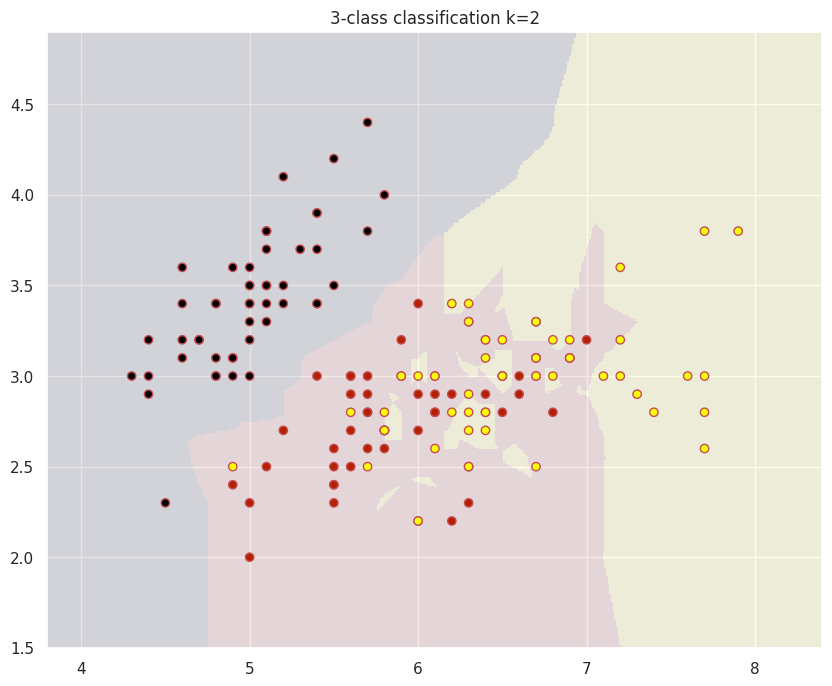

In [42]:
plot_decision_boundries(2)

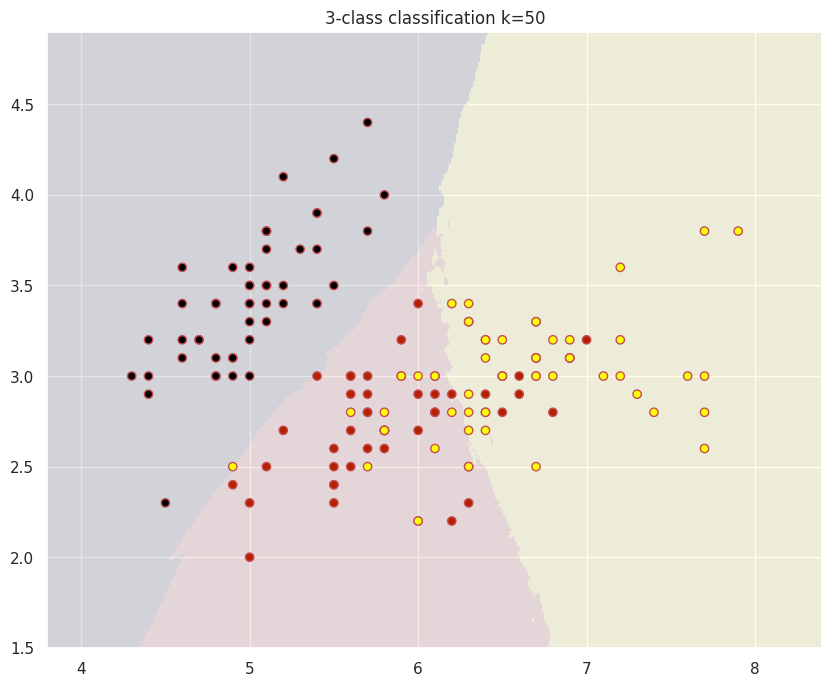

In [43]:
plot_decision_boundries(50)

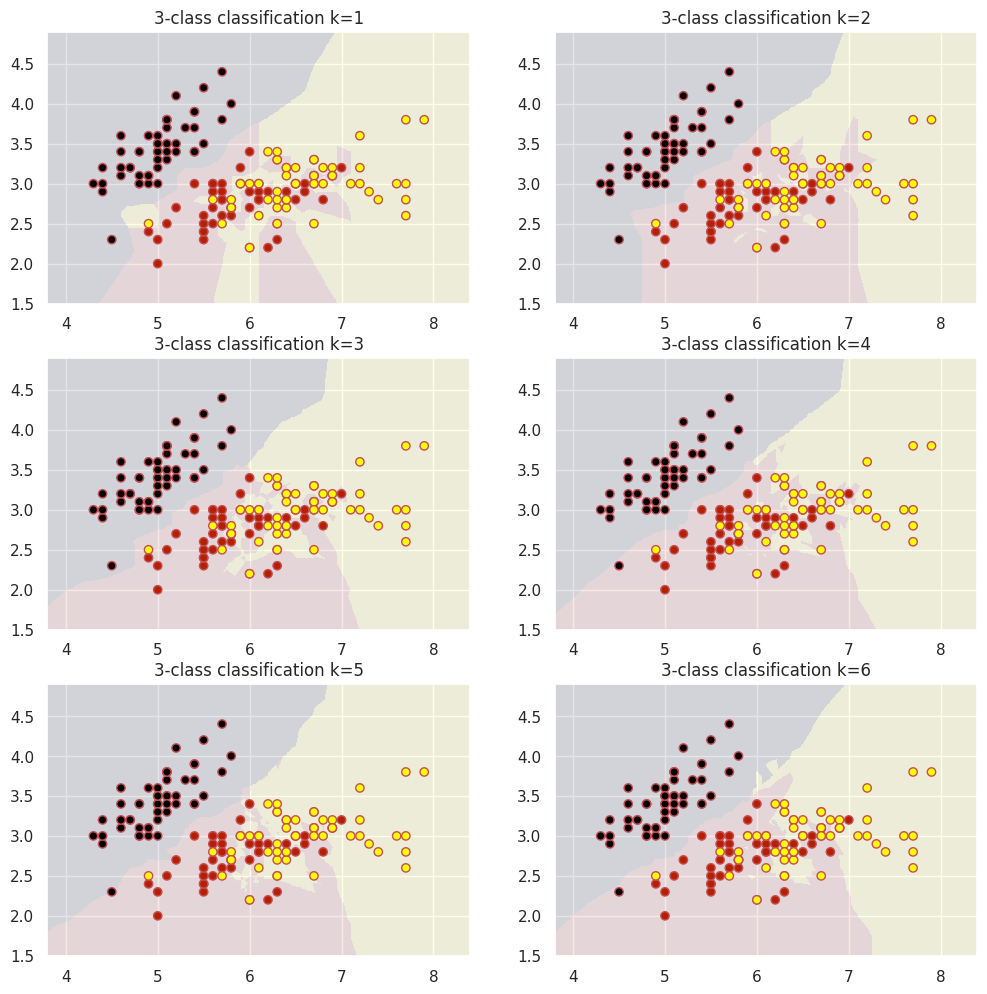

In [44]:
plt.figure(figsize=(12, 12))

for i in range(1, 7):
    plt.subplot(3, 2, i)

    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(data, target)

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    mesh = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.predict(mesh)
    Z = Z.reshape(xx.shape)

    plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
    plt.scatter(data[:, 0], data[:, 1], c=target, cmap='gnuplot', edgecolors='r')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'3-class classification k={i}')

plt.show()